## Estadística  Ejercicios

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import random
import pickle as pkl

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")

numpy==2.2.0
matplotlib==3.10.0
scipy==1.14.1


In [5]:
with open("./Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    fuel_city = pkl.load(f)
with open("./Data/FUELCONSUMPTION_HWY.pkl", "br") as f:
    fuel_hwy = pkl.load(f)

In [6]:
fuel_city # Gasto de combustible en la ciudad

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [ ]:
fuel_hwy # Gasto de combustible en la autovía

### Ejercicio 01:
- Define una función que tome como entrada un array y retorne la varianza. Apóyate en la siguiente fórmula:
$$ \mathbf{S^2} = \frac{1}{n} \sum_{i=1}^{n} (x_{i}^{2}- \overline{x}^2)$$

- Comprueba que funciona correctamente comparándola con _**np.var()**_.

In [7]:
def calcular_varianza(array):
    n = len(array)
    media = np.mean(array)
    suma_cuadrados = np.sum(np.power(array, 2))
    varianza = (suma_cuadrados / n) - (media ** 2)
    return varianza


In [8]:

# Calcular la varianza usando nuestra función
varianza_personalizada = calcular_varianza(fuel_city)

# Calcular la varianza usando np.var()
varianza_np = np.var(fuel_city)

# Mostrar los resultados
print(f"Varianza calculada con la función personalizada: {varianza_personalizada}")
print(f"Varianza calculada con np.var(): {varianza_np}")


Varianza calculada con la función personalizada: 16.80451468569308
Varianza calculada con np.var(): 16.80451468569305


### Ejercicio 02:
- Define una función que tome como entrada un array y retorne la desviación estándar. Apóyate en la siguiente fórmula:

$$ \mathbf{S} = \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}- \overline{x}^2}$$

- Comprueba que funciona correctamente comprobándola con _**np.std()**_.

In [9]:
import numpy as np

def calcular_desviacion_estandar(array):
    n = len(array)
    media = np.mean(array)
    suma_cuadrados = np.sum(np.power(array, 2))
    varianza = (suma_cuadrados / n) - (media ** 2)
    desviacion_estandar = np.sqrt(varianza)
    return desviacion_estandar


In [10]:

# Calcular la varianza usando nuestra función
desviacion_estandar_personalizada = calcular_desviacion_estandar(fuel_city)

# Calcular la varianza usando np.var()
desviacion_estandar_np = np.std(fuel_city)

# Mostrar los resultados
print(f"Desviación estándar calculada con la función personalizada: {desviacion_estandar_personalizada}")
print(f"VariaDesviación estándarnza calculada con np.var(): {desviacion_estandar_np}")

Desviación estándar calculada con la función personalizada: 4.099331004651012
VariaDesviación estándarnza calculada con np.var(): 4.099331004651009


### Ejercicio 03:
- Define una función que tome como parámetro un array y retorne los siguientes estadísticos en forma de diccionario:
    - Mínimo
    - Máximo
    - Media
    - Cuartiles Q1, Q2 (mediana) y Q3
    - Rango intercuartil
    - Desviación estándar
- Prueba la función con los arrays **fuel_city** y **fuel_hwy**.

In [18]:

def estadisticos(array):
    # Crear diccionario
    estadisticas = dict()
 
    # Calcular estadisticas y agregar estadísticas al diccionario
    estadisticas['minimo'] = min_valor = np.min(array)
    estadisticas['maximo'] = np.max(array)
    estadisticas['media'] = np.mean(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    estadisticas['Q1'] = Q1
    estadisticas['Q2'] = np.median(array)
    estadisticas['Q3'] = Q3

    estadisticas['rango_intercuartil'] = Q3 - Q1
    estadisticas['desviacion_estandar'] = np.std(array)
    
    # Retornar el diccionario creado
    return estadisticas




In [23]:
# Calcular los estadísticos para fuel_city
estadisticos_fuel_city = estadisticos(fuel_city)
print("Estadísticos para fuel_city:")
estadisticos_fuel_city



Estadísticos para fuel_city:


{'minimo': np.float64(4.6),
 'maximo': np.float64(30.2),
 'media': np.float64(13.296532333645736),
 'Q1': np.float64(10.25),
 'Q2': np.float64(12.6),
 'Q3': np.float64(15.55),
 'rango_intercuartil': np.float64(5.300000000000001),
 'desviacion_estandar': np.float64(4.099331004651009)}

In [24]:
# Calcular los estadísticos para fuel_hwy
estadisticos_fuel_hwy = estadisticos(fuel_hwy)
print("Estadísticos para fuel_hwy:")
estadisticos_fuel_hwy

Estadísticos para fuel_hwy:


{'minimo': np.float64(4.9),
 'maximo': np.float64(20.5),
 'media': np.float64(9.474601686972822),
 'Q1': np.float64(7.5),
 'Q2': np.float64(8.8),
 'Q3': np.float64(10.850000000000001),
 'rango_intercuartil': np.float64(3.3500000000000014),
 'desviacion_estandar': np.float64(2.793200625370099)}

### Ejercicio 04:
- Define una función que toma un array como entrada, y retorna el mismo array sin los outliers.
- Utiliza la **Puntuación Z** para el filtrado de valores atípicos.
- Prueba la función con los arrays _**fuel_city**_ y _**fuel_hwy**_, y calcula qué porcentaje de datos se ha conservado tras el filtrado de outliers para cada caso.

In [30]:
import numpy as np

def filtrar_outliers(array, z=3.0):
    # Calcular la media y desviación estándar del array
    media = np.mean(array)
    desviacion_estandar = np.std(array)
    
    # Calcular la puntuación Z para cada valor del array
    z_scores = (array - media) / desviacion_estandar
    
    # Filtrar los valores que tienen una puntuación Z menor que el umbral
    array_filtrado = array[np.abs(z_scores) < z]
    
    return array_filtrado


In [31]:
# Filtrar outliers en fuel_city
fuel_city_filtrado = filtrar_outliers(fuel_city)
porcentaje_fuel_city = (len(fuel_city_filtrado) / len(fuel_city)) * 100

# Filtrar outliers en fuel_hwy
fuel_hwy_filtrado = filtrar_outliers(fuel_hwy)
porcentaje_fuel_hwy = (len(fuel_hwy_filtrado) / len(fuel_hwy)) * 100

# Mostrar los resultados
print(f"Porcentaje de datos conservados en fuel_city: {porcentaje_fuel_city:.2f}%")

print(f"Porcentaje de datos conservados en fuel_hwy: {porcentaje_fuel_hwy:.2f}%")


Porcentaje de datos conservados en fuel_city: 99.34%
Porcentaje de datos conservados en fuel_hwy: 98.13%


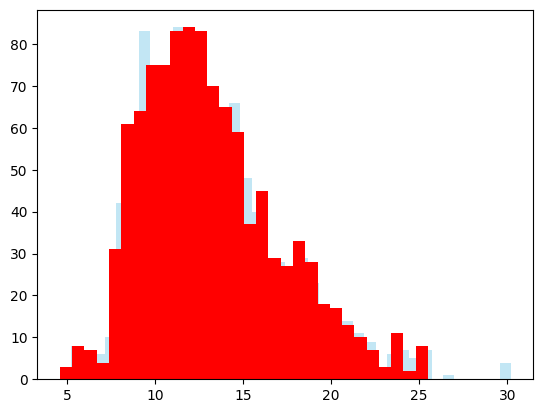

In [32]:
plt.hist(fuel_city, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(fuel_city_filtrado, bins = 30, color = "red");

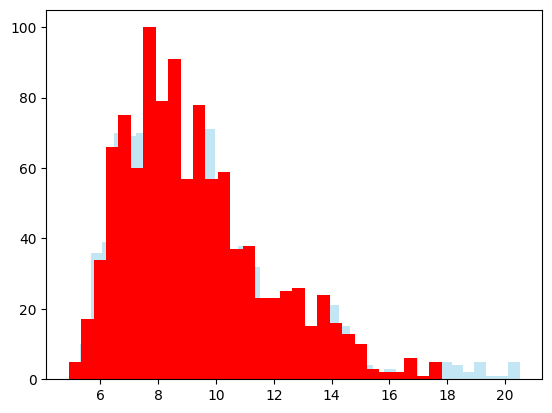

In [33]:
plt.hist(fuel_hwy, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(fuel_hwy_filtrado, bins = 30, color = "red");

### Ejercicio 05:
- Repite el ejercicio 4 usando la **Valla de Tukey** para el filtrado de outliers.

In [34]:


def filtrar_outliers_tukey(array, k=1.5):
    # Calcular los cuartiles y el rango intercuartil
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1
    
    # Calcular los límites inferior y superior
    limite_inferior = Q1 - k * IQR
    limite_superior = Q3 + k * IQR
    
    # Filtrar los valores que están dentro de los límites
    array_filtrado = array[(array >= limite_inferior) & (array <= limite_superior)]
    
    return array_filtrado


In [35]:
# Filtrar outliers en fuel_city
fuel_city_filtrado = filtrar_outliers_tukey(fuel_city)
porcentaje_fuel_city = (len(fuel_city_filtrado) / len(fuel_city)) * 100

# Filtrar outliers en fuel_hwy
fuel_hwy_filtrado = filtrar_outliers_tukey(fuel_hwy)
porcentaje_fuel_hwy = (len(fuel_hwy_filtrado) / len(fuel_hwy)) * 100

# Mostrar los resultados
print(f"Porcentaje de datos conservados en fuel_city: {porcentaje_fuel_city:.2f}%")

print(f"Porcentaje de datos conservados en fuel_hwy: {porcentaje_fuel_hwy:.2f}%")


Porcentaje de datos conservados en fuel_city: 97.56%
Porcentaje de datos conservados en fuel_hwy: 96.72%


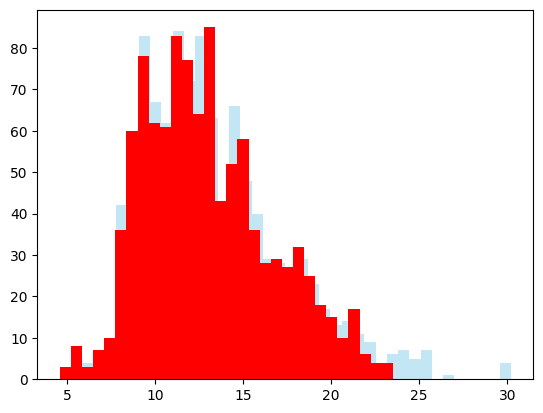

In [36]:
plt.hist(fuel_city, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(fuel_city_filtrado, bins = 30, color = "red");

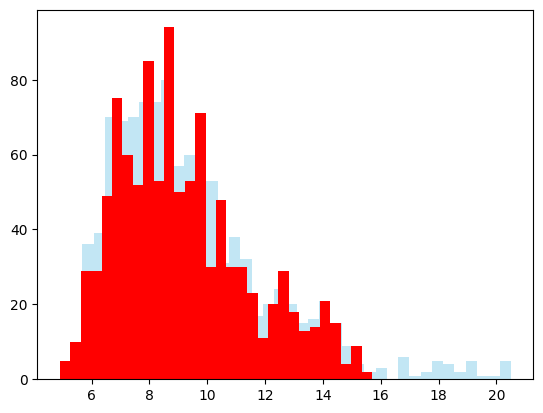

In [37]:
plt.hist(fuel_hwy, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(fuel_hwy_filtrado, bins = 30, color = "red");

### Ejercicio 06:
- Define una función que tome como parámetro un array y dibuje un plot. El plot debe tener:
    - La distribución de los datos del array como un histograma de color verde pastel.
    - Una línea vertical de color rojo que represente el promedio.
    - Una línea vertical de color dorado que represente la mediana.
    - Dos líneas verticales discontinuas de color gris claro que representen $-z$ y $z$.
    - Dos líneas verticales discontinuas de color gris oscuro que representen $-3z$ y $3z$.
    - Los outliers se tienen que marcar con un color naranja chillón.
    
- Aprovecha las funciones del ejercicio 1 y del ejercicio 3 para obtener los estadísticos necesarios y filtrar los outliers.
- Guiate por los notebooks de teoría para cambiar el color de las gráficas y hacer las lineas verticales.

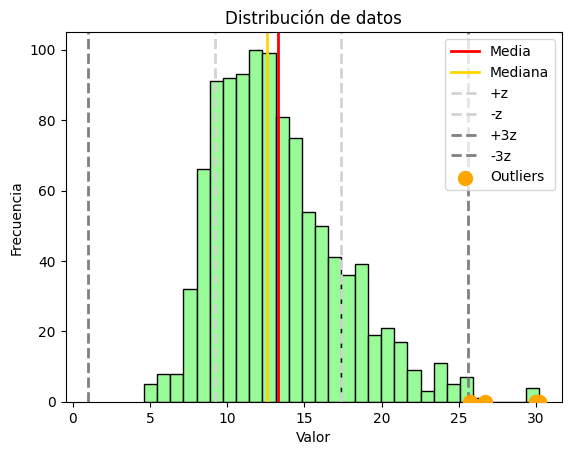

In [41]:

def plot_data(array):
    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    
    # Filtrar outliers
    outliers = array[(array < media - 3*desviacion_estandar) | (array > media + 3*desviacion_estandar)]
    
    # Crear el histograma
    plt.hist(array, bins=30, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    plt.axvline(media, color='red', linestyle='-', linewidth=2, label='Media')
    plt.axvline(mediana, color='gold', linestyle='-', linewidth=2, label='Mediana')
    plt.axvline(media + desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='+z')
    plt.axvline(media - desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='-z')
    plt.axvline(media + 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='+3z')
    plt.axvline(media - 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='-3z')
    
    # Marcar los outliers
    plt.scatter(outliers, np.zeros_like(outliers), color='orange', s=100, label='Outliers', zorder=5)
    
    # Agregar leyenda y título
    plt.legend()
    plt.title('Distribución de datos')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
plot_data(fuel_city)


### Ejercicio 07:
- Define una función que estandarice los datos de un array usando la siguiente fórmula:

$$
z = \frac{x_{i} - \overline{x}}{\sigma_{x}} = \frac{x_{i} - mean(x)}{std(x)}
$$

- Prueba estandarizar un array y hacer un plot usando la función del ejercicio anterior. ¿Qué diferencias ves?

In [42]:
def estandarizar(array):
    media = np.mean(array)
    desviacion_estandar = np.std(array)
    return (array - media) / desviacion_estandar


In [43]:
def plot_data(array):
    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    
    z_scores = estandarizar(array)
    
    # Filtrar outliers
    outliers = array[(z_scores < -3) | (z_scores > 3)]
    
    # Crear el histograma
    plt.hist(array, bins=30, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    plt.axvline(media, color='red', linestyle='-', linewidth=2, label='Media')
    plt.axvline(mediana, color='gold', linestyle='-', linewidth=2, label='Mediana')
    plt.axvline(media + desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='+z')
    plt.axvline(media - desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='-z')
    plt.axvline(media + 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='+3z')
    plt.axvline(media - 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='-3z')
    
    # Marcar los outliers
    plt.scatter(outliers, np.zeros_like(outliers), color='orange', s=100, label='Outliers', zorder=5)
    
    # Agregar leyenda y título
    plt.legend()
    plt.title('Distribución de datos')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    
    # Mostrar el gráfico
    plt.show()



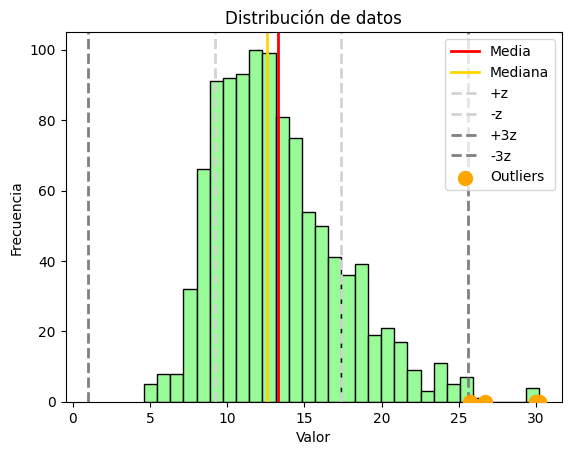

In [44]:
# Ejemplo de uso
plot_data(fuel_city)

### Ejercicio 08:
- Aplica una transformación de logaritmo neperiano (_**np.log**_) a los datos de **fuel_city** y **fuel_hwy** y vuelve a probar a usar la función del ejercicio 6.
- ¿Cómo son ahora las distribuciones?
- ¿Qué ocurre con los outliers?

In [45]:
# Aplicamos la transformación de logaritmo natural
log_fuel_city = np.log(fuel_city)
log_fuel_hwy = np.log(fuel_hwy)

In [48]:
# Definimos la función para graficar
def plot_data(array, title):
    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    
    # Filtrar outliers
    outliers = array[(array < media - 3*desviacion_estandar) | (array > media + 3*desviacion_estandar)]
    
    # Crear el histograma
    plt.hist(array, bins=30, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    plt.axvline(media, color='red', linestyle='-', linewidth=2, label='Media')
    plt.axvline(mediana, color='gold', linestyle='-', linewidth=2, label='Mediana')
    plt.axvline(media + desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='+z')
    plt.axvline(media - desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label='-z')
    plt.axvline(media + 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='+3z')
    plt.axvline(media - 3*desviacion_estandar, color='grey', linestyle='--', linewidth=2, label='-3z')
    
    # Marcar los outliers
    plt.scatter(outliers, np.zeros_like(outliers), color='orange', s=100, label='Outliers', zorder=5)
    
    # Agregar leyenda y título
    plt.legend()
    plt.title(title)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    
    # Mostrar el gráfico
    plt.show()

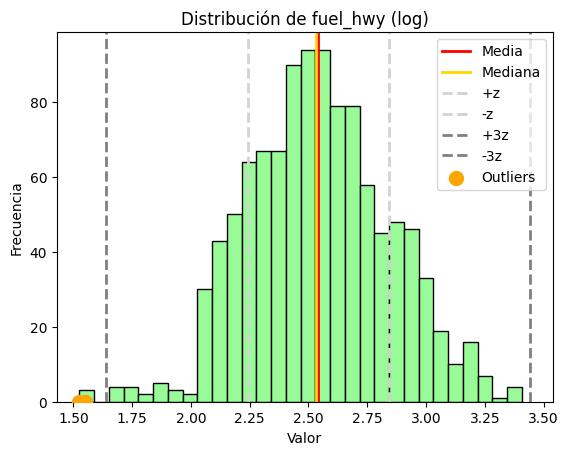

In [49]:
# Graficamos los datos transformados
plot_data(log_fuel_city, 'Distribución de fuel_hwy (log)')

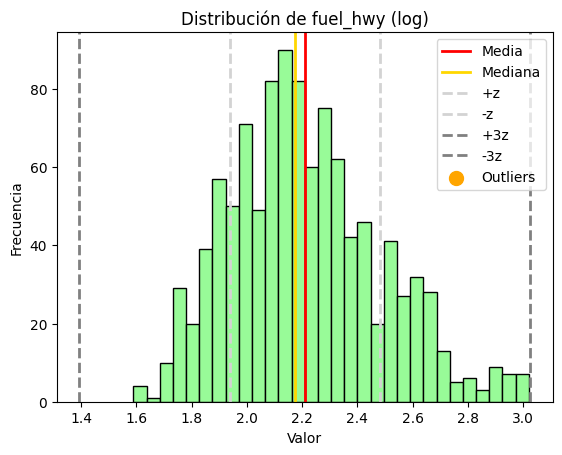

In [50]:
# Graficamos los datos transformados
plot_data(log_fuel_hwy, 'Distribución de fuel_hwy (log)')

### Ejercicio 09:
- Defina una función que calcule la correlación entre dos arrays. Apoyate en las siguientes fórmulas:

$$
\Large Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n}\\
$$

<br>

$$
\Large \rho = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}
$$

- Usa la función para calcular la correlación entre **fuel_city** y **fuel_hwy**.
- Comprueba que funciona correctamente contrastando con el resultado de la función _**stats.pearsonr()**_.

In [51]:
def calcular_correlacion(x, y):
    # Calcular la media de x y y
    media_x = np.mean(x)
    media_y = np.mean(y)
    
    # Calcular la covarianza
    covarianza = np.sum((x - media_x) * (y - media_y)) / len(x)
    
    # Calcular las desviaciones estándar de x y y
    desviacion_x = np.std(x)
    desviacion_y = np.std(y)
    
    # Calcular la correlación
    correlacion = covarianza / (desviacion_x * desviacion_y)
    
    return correlacion

In [52]:
# Calcular la correlación usando la función definida
correlacion_manual = calcular_correlacion(fuel_city, fuel_hwy)
print("Correlación calculada manualmente:", correlacion_manual)

# Calcular la correlación usando scipy
correlacion_scipy, _ = stats.pearsonr(fuel_city, fuel_hwy)
print("Correlación calculada con scipy:", correlacion_scipy)

Correlación calculada manualmente: 0.9657182219820531
Correlación calculada con scipy: 0.965718221982053


### Ejercicio 10:
- Elige un array y toma 50 elementos aleatorios. Calcula las estadísticas para ese nuevo conjunto de datos.
- ¿Son similares estos resultados a los obtenidos de la población total?

In [53]:

# Tomamos una muestra aleatoria de 50 elementos
muestra_aleatoria = np.random.choice(fuel_city, 50, replace=False)

# Calculamos las estadísticas para la población total
media_total = np.mean(fuel_city)
mediana_total = np.median(fuel_city)
desviacion_total = np.std(fuel_city)

# Calculamos las estadísticas para la muestra aleatoria
media_muestra = np.mean(muestra_aleatoria)
mediana_muestra = np.median(muestra_aleatoria)
desviacion_muestra = np.std(muestra_aleatoria)


Población total - Media: 13.296532333645736 Mediana: 12.6 Desviación estándar: 4.099331004651009
Muestra aleatoria - Media: 13.718000000000002 Mediana: 13.100000000000001 Desviación estándar: 4.147948408550906


In [57]:
# Imprimimos los resultados
print(f'Población total   : Media: {media_total:.3f}, Mediana: {mediana_total:.3f}, Desviación estándar: {desviacion_total:.3f}')
print(f'Muestra aleatoria : Media: {media_muestra:.3f}, Mediana: {mediana_muestra:.3f}, Desviación estándar: {desviacion_muestra:.3f}')


Población total   : Media: 13.297, Mediana: 12.600, Desviación estándar: 4.099
Muestra aleatoria : Media: 13.718, Mediana: 13.100, Desviación estándar: 4.148


### Ejercicio 11:
- Repite el ejercicio anterior, esta vez creando 5 conjuntos de 50 elementos aleatorios.
    - Calcula las estadísticas para cada conjunto de 50 elementos, guarda estos datos.
    - Calcula las estadísticas de los resultados anteriores.
    - ¿Son similares estos datos con los obtenidos de la población total?
    - Prueba hacerlo creando 100 conjuntos de 50 elementos esta vez.

In [58]:

# Crear 5 conjuntos de 50 elementos aleatorios y calcular estadísticas
estadisticas_5_conjuntos = []
for _ in range(5):
    muestra = np.random.choice(fuel_city, 50, replace=False)
    estadisticas_5_conjuntos.append(estadisticos(muestra))

# Imprimir las estadísticas de los 5 conjuntos
print("Estadísticas de los 5 conjuntos:")
for i, estadisticas in enumerate(estadisticas_5_conjuntos, 1):
    print(f"Conjunto {i}: {estadisticas}")

# Calcular estadísticas de los resultados anteriores
medias_5 = [e['media'] for e in estadisticas_5_conjuntos]
medianas_5 = [e['Q2'] for e in estadisticas_5_conjuntos]
desviaciones_5 = [e['desviacion_estandar'] for e in estadisticas_5_conjuntos]

media_de_medias_5 = np.mean(medias_5)
mediana_de_medianas_5 = np.median(medianas_5)
desviacion_de_desviaciones_5 = np.mean(desviaciones_5)



Estadísticas de los 5 conjuntos:
Conjunto 1: {'minimo': np.float64(6.6), 'maximo': np.float64(20.6), 'media': np.float64(12.27), 'Q1': np.float64(9.325000000000001), 'Q2': np.float64(11.5), 'Q3': np.float64(14.675), 'rango_intercuartil': np.float64(5.35), 'desviacion_estandar': np.float64(3.560407280073447)}
Conjunto 2: {'minimo': np.float64(7.8), 'maximo': np.float64(24.5), 'media': np.float64(13.132), 'Q1': np.float64(10.25), 'Q2': np.float64(12.4), 'Q3': np.float64(14.675), 'rango_intercuartil': np.float64(4.425000000000001), 'desviacion_estandar': np.float64(3.9583552139746123)}
Conjunto 3: {'minimo': np.float64(6.0), 'maximo': np.float64(25.3), 'media': np.float64(13.624), 'Q1': np.float64(10.425), 'Q2': np.float64(13.5), 'Q3': np.float64(15.375), 'rango_intercuartil': np.float64(4.949999999999999), 'desviacion_estandar': np.float64(4.255375894089734)}
Conjunto 4: {'minimo': np.float64(4.7), 'maximo': np.float64(30.2), 'media': np.float64(13.725999999999999), 'Q1': np.float64(10.6

In [60]:
print(f'Media de medias (5 conjuntos): {media_de_medias_5}')
print(f'Mediana de medianas (5 conjuntos): {mediana_de_medianas_5}')
print(f'Desviación de desviaciones (5 conjuntos): {desviacion_de_desviaciones_5}')

Media de medias (5 conjuntos): 13.222800000000001
Mediana de medianas (5 conjuntos): 12.45
Desviación de desviaciones (5 conjuntos): 4.145793214010011


In [61]:
# Ahora, repitamos el proceso para 100 conjuntos
estadisticas_100_conjuntos = []
for _ in range(100):
    muestra = np.random.choice(fuel_city, 50, replace=False)
    estadisticas_100_conjuntos.append(estadisticos(muestra))

# Imprimir algunas estadísticas de los 100 conjuntos (solo las primeras 5 para no sobrecargar la salida)
print("\nEstadísticas de los 100 conjuntos (muestra de los primeros 5):")
for i, estadisticas in enumerate(estadisticas_100_conjuntos[:5], 1):
    print(f"Conjunto {i}: {estadisticas}")

# Calcular estadísticas de los resultados anteriores
medias_100 = [e['media'] for e in estadisticas_100_conjuntos]
medianas_100 = [e['Q2'] for e in estadisticas_100_conjuntos]
desviaciones_100 = [e['desviacion_estandar'] for e in estadisticas_100_conjuntos]

media_de_medias_100 = np.mean(medias_100)
mediana_de_medianas_100 = np.median(medianas_100)
desviacion_de_desviaciones_100 = np.mean(desviaciones_100)




Estadísticas de los 100 conjuntos (muestra de los primeros 5):
Conjunto 1: {'minimo': np.float64(6.6), 'maximo': np.float64(30.0), 'media': np.float64(13.137999999999998), 'Q1': np.float64(9.850000000000001), 'Q2': np.float64(11.9), 'Q3': np.float64(14.5), 'rango_intercuartil': np.float64(4.649999999999999), 'desviacion_estandar': np.float64(4.876018457717321)}
Conjunto 2: {'minimo': np.float64(5.8), 'maximo': np.float64(25.5), 'media': np.float64(12.772), 'Q1': np.float64(9.75), 'Q2': np.float64(12.1), 'Q3': np.float64(14.375), 'rango_intercuartil': np.float64(4.625), 'desviacion_estandar': np.float64(4.280889627168633)}
Conjunto 3: {'minimo': np.float64(5.6), 'maximo': np.float64(30.2), 'media': np.float64(13.671999999999999), 'Q1': np.float64(10.0), 'Q2': np.float64(12.9), 'Q3': np.float64(16.55), 'rango_intercuartil': np.float64(6.550000000000001), 'desviacion_estandar': np.float64(4.844999071207341)}
Conjunto 4: {'minimo': np.float64(7.2), 'maximo': np.float64(26.7), 'media': np.

In [62]:
print(f'Media de medias (100 conjuntos): {media_de_medias_100}')
print(f'Mediana de medianas (100 conjuntos): {mediana_de_medianas_100}')
print(f'Desviación de desviaciones (100 conjuntos): {desviacion_de_desviaciones_100}')


Media de medias (100 conjuntos): 13.26442
Mediana de medianas (100 conjuntos): 12.525
Desviación de desviaciones (100 conjuntos): 4.104663249699829


### Ejercicio 12:
- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

In [78]:
alpha = 0.05

In [68]:
# Verificamos los supuestos de normalidad con la 
_, p_city = stats.normaltest(fuel_city)
_, p_hwy = stats.normaltest(fuel_hwy)

print(f'Prueba de normalidad para fuel_city: {p_city}')
print(f'Prueba de normalidad para fuel_hwy: {p_hwy}')


Prueba de normalidad para fuel_city: 6.448140852748941e-29
Prueba de normalidad para fuel_hwy: 1.7367717953636e-50


In [74]:
# Verificamos los supuestos de normalidad con la prueba de Shapiro-Wilk ver
_,p_city = stats.shapiro(fuel_city)
_,p_hwy = stats.shapiro(fuel_hwy)

print(f'Prueba de Shapiro-Wilk para fuel_city: {p_city}')
print(f'"Prueba de Shapiro-Wilk para fuel_hwy: {p_hwy}')



Prueba de Shapiro-Wilk para fuel_city: 3.2304429584468415e-18
"Prueba de Shapiro-Wilk para fuel_hwy: 1.2584578635372469e-24


In [72]:
# Verificamos la homogeneidad de varianzas con la prueba de Levene
_,p_var = stats.levene(fuel_city, fuel_hwy)
print(f'Prueba de Levene: {p_var}')



Prueba de Levene: 1.6747842967728482e-25


In [81]:
# Si ambas distribuciones son normales y las varianzas son homogéneas, usamos t de Student
# Si no, usamos Wilcoxon
suposiciones = p_city > alpha and p_hwy > alpha and p_var > alpha


if suposiciones:
    # prueba parametrica
    _,p_consumo = stats.ttest_rel(fuel_city, fuel_hwy, alternative='greater')
    print("Prueba t de Student para muestras pareadas:", p_consumo)
else:
    # prueba no parametrica
    _,p_consumo = stats.wilcoxon(fuel_city, fuel_hwy, alternative='greater')
    print("Prueba de Wilcoxon para muestras pareadas:", p_consumo)
    
if p_consumo < alpha:
    print("H1 VERDADERO - Hay diferencias significativas entre el consumo en ciudad y en autovía Rechazamos la hipótesis nula")
else:
    print("H0 VERDADERO - No hay diferencias significativas entre el consumo en ciudad y en autovía No rechazamos la hipótesis nula")

Prueba de Wilcoxon para muestras pareadas: 2.9678958260437154e-176
H1 VERDADERO - Hay diferencias significativas entre el consumo en ciudad y en autovía Rechazamos la hipótesis nula


In [ ]:
##############################################################################################################################